In [4]:
from lyricsgenius import Genius
# from gensim.summarization import keywords
import spacy
import nltk
import re
import os
import pandas as pd
from textblob import TextBlob 
import billboard
from tqdm import tqdm
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import os
import json
from requests import post, get
import base64

# read full data

In [5]:
lyrics_w_genre=pd.read_csv('/Users/zhuxiaoai/Desktop/lyrics_w_genre.csv')
lyrics_w_genre

,song_title,artist_name,rank,year,song_lyrics,language,artist_id,genre_artist
0,Firework,Katy Perry,1,2010,128 ContributorsTranslationsPortuguêsTürkçeIta...,en,NaN,NaN
1,Grenade,Bruno Mars,2,2010,137 ContributorsTranslationsPortuguêsFrançaisE...,en,0du5cEVh5yTK9QJze8zA0C,dance pop
2,What's My Name?,Rihanna Featuring Drake,3,2010,117 ContributorsTranslationsEspañolPortuguêsEn...,en,NaN,NaN
3,Raise Your Glass,P!nk,4,2010,37 ContributorsRaise Your Glass Lyrics[Verse 1...,en,1KCSPY1glIKqW2TotWuXOR,dance pop
4,We R Who We R,Ke$ha,5,2010,52 ContributorsTranslationsPortuguêsWe R Who W...,en,17jHTblN6WXR5MRIid1zay,NaN
...,...,...,...,...,...,...,...,...
1240,Feather,Sabrina Carpenter,94,2023,42 ContributorsTranslationsPortuguêsEspañolСрп...,en,74KM79TiuVKeVCqs8QtB0B,pop
1241,Can't Catch Me Now,Olivia Rodrigo,95,2023,73 ContributorsTranslationsEspañolPortuguêsDeu...,en,1McMsnEElThX1knmY4oliG,pop
1242,Standing Next To You,Jung Kook,97,2023,44 ContributorsTranslationsEspañol日本語العربيةРу...,en,6HaGTQPmzraVmaVxvz6EUc,k-pop
1243,Man Made A Bar,Morgan Wallen Featuring Eric Church,98,2023,15 ContributorsMan Made A Bar Lyrics[Verse 1: ...,en,NaN,NaN


# process the lyrics

In [6]:
# process the lyrics
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

def process_lyrics(lyrics):
    # remove special characters
    lyrics = re.sub(r'[^a-zA-Z\s]', '', lyrics)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    lyrics = ' '.join([word for word in lyrics.split() if word.lower() not in stop_words])
    # lemmatize
    doc = nlp(lyrics)
    lyrics = ' '.join([token.lemma_ for token in doc])
    return lyrics

lyrics_w_genre['processed_lyrics'] = lyrics_w_genre['song_lyrics'].apply(process_lyrics)
lyrics_w_genre

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhuxiaoai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zhuxiaoai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,song_title,artist_name,rank,year,song_lyrics,language,artist_id,genre_artist,processed_lyrics
0,Firework,Katy Perry,1,2010,128 ContributorsTranslationsPortuguêsTürkçeIta...,en,NaN,NaN,ContributorsTranslationsPortugusTrkeItalianoFi...
1,Grenade,Bruno Mars,2,2010,137 ContributorsTranslationsPortuguêsFrançaisE...,en,0du5cEVh5yTK9QJze8zA0C,dance pop,contributorstranslationsportugusfranaisespaold...
2,What's My Name?,Rihanna Featuring Drake,3,2010,117 ContributorsTranslationsEspañolPortuguêsEn...,en,NaN,NaN,ContributorsTranslationsEspaolPortugusEnglishW...
3,Raise Your Glass,P!nk,4,2010,37 ContributorsRaise Your Glass Lyrics[Verse 1...,en,1KCSPY1glIKqW2TotWuXOR,dance pop,ContributorsRaise Glass LyricsVerse right righ...
4,We R Who We R,Ke$ha,5,2010,52 ContributorsTranslationsPortuguêsWe R Who W...,en,17jHTblN6WXR5MRIid1zay,NaN,ContributorsTranslationsPortugusWe r r LyricsV...
...,...,...,...,...,...,...,...,...,...
1240,Feather,Sabrina Carpenter,94,2023,42 ContributorsTranslationsPortuguêsEspañolСрп...,en,74KM79TiuVKeVCqs8QtB0B,pop,contributorstranslationsportugusespaolfranaisf...
1241,Can't Catch Me Now,Olivia Rodrigo,95,2023,73 ContributorsTranslationsEspañolPortuguêsDeu...,en,1McMsnEElThX1knmY4oliG,pop,ContributorsTranslationsEspaolPortugusDeutsche...
1242,Standing Next To You,Jung Kook,97,2023,44 ContributorsTranslationsEspañol日本語العربيةРу...,en,6HaGTQPmzraVmaVxvz6EUc,k-pop,contributorstranslationsespaolfranaisdeutschst...
1243,Man Made A Bar,Morgan Wallen Featuring Eric Church,98,2023,15 ContributorsMan Made A Bar Lyrics[Verse 1: ...,en,NaN,NaN,ContributorsMan make Bar LyricsVerse Morgan Wa...


# minimize noises

In [180]:
# delet the contributors thing in every song lyrics
def remove_contributors(lyrics):
    # fist lower the lyrics
    lyrics = lyrics.lower()
    # into list
    lyrics = lyrics.split(' ')
    # remove the first element
    lyrics = lyrics[1:]
    # delete these words
    delet=['verse', 'bridge', 'chorus', 'lyrics', 'la', 'oh', 'na', 'hey', 'yeah', 'whoa','m', 'll','ive','intro','outro',
           'ooh', 'whoah', 'ahhh','ding','nigga','dong','dododo','dodo','lyricsverse','nana','s','lyricsintro','d',
           'mmmm','dingdongding','niggas','dingdongde','uh','uhhuh','re','gon']
    lyrics = [word for word in lyrics if word not in delet]
    # join the list
    lyrics = ' '.join(lyrics)
    return lyrics

lyrics_w_genre['processed_lyrics'] = lyrics_w_genre['processed_lyrics'].apply(remove_contributors)

In [181]:
lyrics_w_genre.drop('Unnamed: 0',axis=1,inplace=True)

# sentiment analysis

In [182]:
# sentiment analysis
def sentiment_analysis(lyrics):
    blob = TextBlob(lyrics)
    return blob.sentiment.polarity

lyrics_w_genre['sentiment'] = lyrics_w_genre['processed_lyrics'].apply(sentiment_analysis)
lyrics_w_genre

,song_title,artist_name,rank,year,song_lyrics,language,artist_id,genre_artist,processed_lyrics,sentiment
0,Firework,Katy Perry,1,2010,128 ContributorsTranslationsPortuguêsTürkçeIta...,en,NaN,NaN,wind want start ever feel feel paperthin like ...,0.310937
1,Grenade,Bruno Mars,2,2010,137 ContributorsTranslationsPortuguêsFrançaisE...,en,0du5cEVh5yTK9QJze8zA0C,pop,take take take never give should ve know troub...,-0.003571
2,What's My Name?,Rihanna Featuring Drake,3,2010,117 ContributorsTranslationsEspañolPortuguêsEn...,en,NaN,NaN,what name what name what name what name what n...,0.231988
3,Raise Your Glass,P!nk,4,2010,37 ContributorsRaise Your Glass Lyrics[Verse 1...,en,1KCSPY1glIKqW2TotWuXOR,pop,to lose mind tonight what dealio love much tur...,-0.082262
4,We R Who We R,Ke$ha,5,2010,52 ContributorsTranslationsPortuguêsWe R Who W...,en,17jHTblN6WXR5MRIid1zay,NaN,one we roll we cause make hipster fall love ge...,-0.272250
...,...,...,...,...,...,...,...,...,...,...
1240,Feather,Sabrina Carpenter,94,2023,42 ContributorsTranslationsPortuguêsEspañolСрп...,en,74KM79TiuVKeVCqs8QtB0B,pop,come true platter pull back try make plan two ...,0.117000
1241,Can't Catch Me Now,Olivia Rodrigo,95,2023,73 ContributorsTranslationsEspañolPortuguêsDeu...,en,1McMsnEElThX1knmY4oliG,pop,write wall shadows we still dancin every room ...,0.076837
1242,Standing Next To You,Jung Kook,97,2023,44 ContributorsTranslationsEspañol日本語العربيةРу...,en,6HaGTQPmzraVmaVxvz6EUc,k-pop,funk give miracle let ya body know make known ...,0.018027
1243,Man Made A Bar,Morgan Wallen Featuring Eric Church,98,2023,15 ContributorsMan Made A Bar Lyrics[Verse 1: ...,en,NaN,NaN,like dern fool cause walk bartender say get ca...,0.246834


In [183]:
lyrics_w_genre.to_csv('lyrics_w_genre.csv') #update the full data

In [184]:
lyrics_w_genre['sentiment'].describe()

count    1245.000000
mean        0.087494
std         0.186421
min        -0.671429
25%        -0.035422
50%         0.076282
75%         0.196104
max         0.792857
Name: sentiment, dtype: float64

# overall trend and top 15 trend

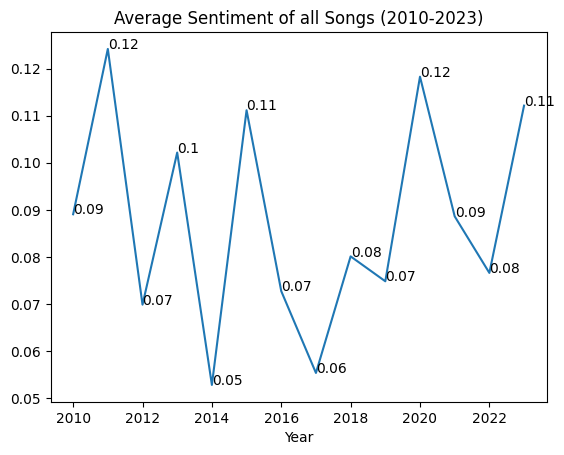

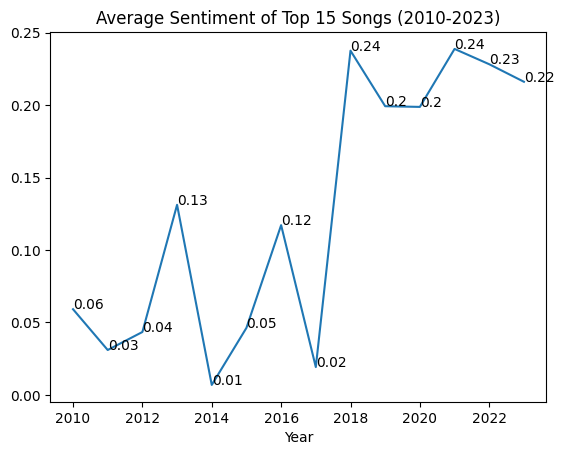

In [185]:
# plot a line chart that show avg sentiment of the top 10 songs trend from 2010 to 2023
import matplotlib.pyplot as plt
# plot the overall trend
overall_songs = lyrics_w_genre.groupby('year')['sentiment'].mean()
plt.plot(overall_songs.index, overall_songs.values)
plt.xlabel('Year')
for i in range(len(overall_songs)):
    plt.text(overall_songs.index[i], overall_songs.values[i], round(overall_songs.values[i], 2))
# plt.yticks([round(i, 2) for i in overall_songs.values])
plt.title('Average Sentiment of all Songs (2010-2023)')
plt.show()

# Filter the top 15 songs from 2010 to 2023
top_15_songs = lyrics_w_genre[lyrics_w_genre['rank'] <= 15]
top_15_songs = top_15_songs.groupby('year')['sentiment'].mean()

# Plot the line chart and add numbers round into decimal
plt.plot(top_15_songs.index, top_15_songs.values)
plt.xlabel('Year')
for i in range(len(top_15_songs)):
    plt.text(top_15_songs.index[i], top_15_songs.values[i], round(top_15_songs.values[i], 2))
# plt.yticks([round(i, 2) for i in top_15_songs.values])
plt.title('Average Sentiment of Top 15 Songs (2010-2023)')
plt.show()


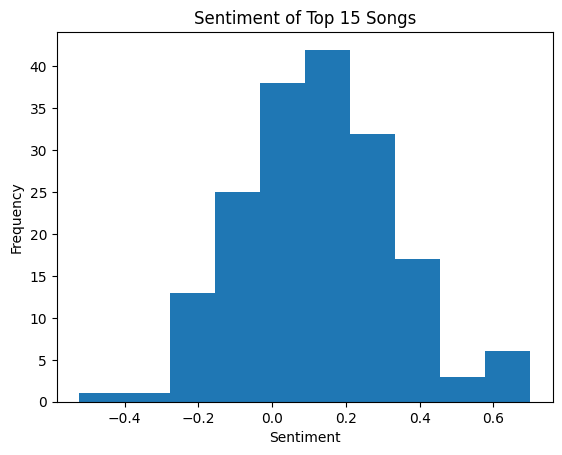

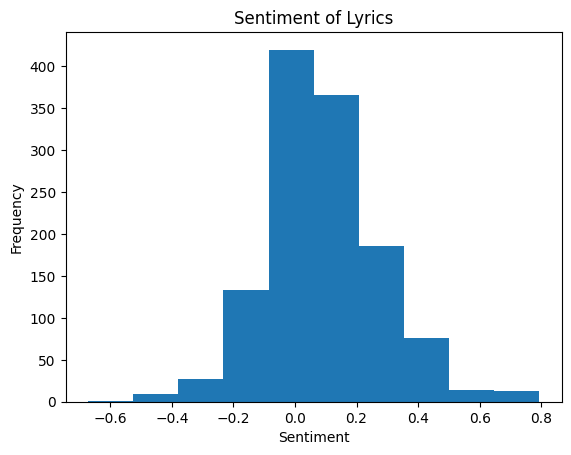

Sentiment count-top15
(-0.0336, 0.211]     80
(0.211, 0.455]       49
(-0.278, -0.0336]    38
(0.455, 0.7]          9
(-0.525, -0.278]      2
Name: count, dtype: int64
Sentiment count
(-0.0857, 0.207]     786
(0.207, 0.5]         264
(-0.379, -0.0857]    160
(0.5, 0.793]          25
(-0.674, -0.379]      10
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [186]:
# lyrics_df['sentiment'] = lyrics_df['song_lyrics'].apply(get_sentiment)
# visualize the sentiment
import matplotlib.pyplot as plt

# top_15_songs
top_15_songs=lyrics_w_genre[lyrics_w_genre['rank'] <= 15]
plt.hist(top_15_songs['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment of Top 15 Songs')
plt.show()
plt.savefig('sentimentTop15.png')

plt.hist(lyrics_w_genre['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment of Lyrics')
plt.show()
plt.savefig('sentiment.png')

# print the count of positive, negative and neutral sentiments in 9 different bins
print('Sentiment count-top15')
print(top_15_songs['sentiment'].value_counts(bins=5))

print('Sentiment count')
print(lyrics_w_genre['sentiment'].value_counts(bins=5))

# wordcloud without genre

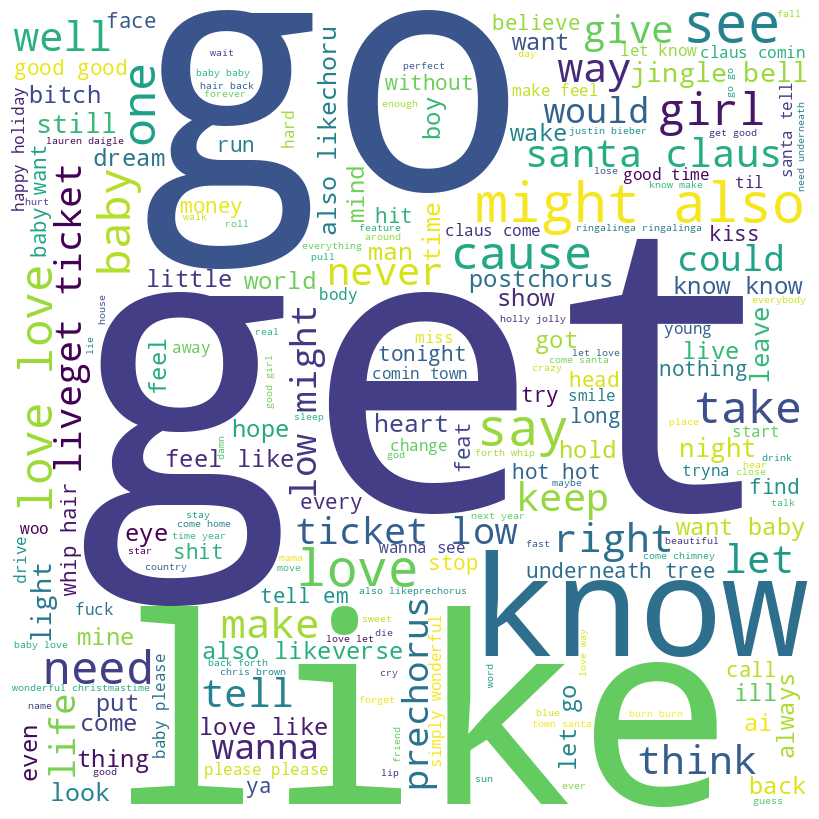

In [187]:
# generate two wordclouds for positive and negative sentiment and neutral sentiment
positive_lyrics = lyrics_w_genre[lyrics_w_genre['sentiment'] > 0.1]
negative_lyrics = lyrics_w_genre[lyrics_w_genre['sentiment'] < -0.4]
neutral_lyrics = lyrics_w_genre[(lyrics_w_genre['sentiment'] >= -0.4) & (lyrics_w_genre['sentiment'] <= 0.1)]

from wordcloud import WordCloud
from nltk.corpus import stopwords

# Generate a word cloud image for positive sentiment
pos = ' '.join(positive_lyrics['processed_lyrics'])
stop_words = set(stopwords.words('english'))

# donot 
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(pos)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

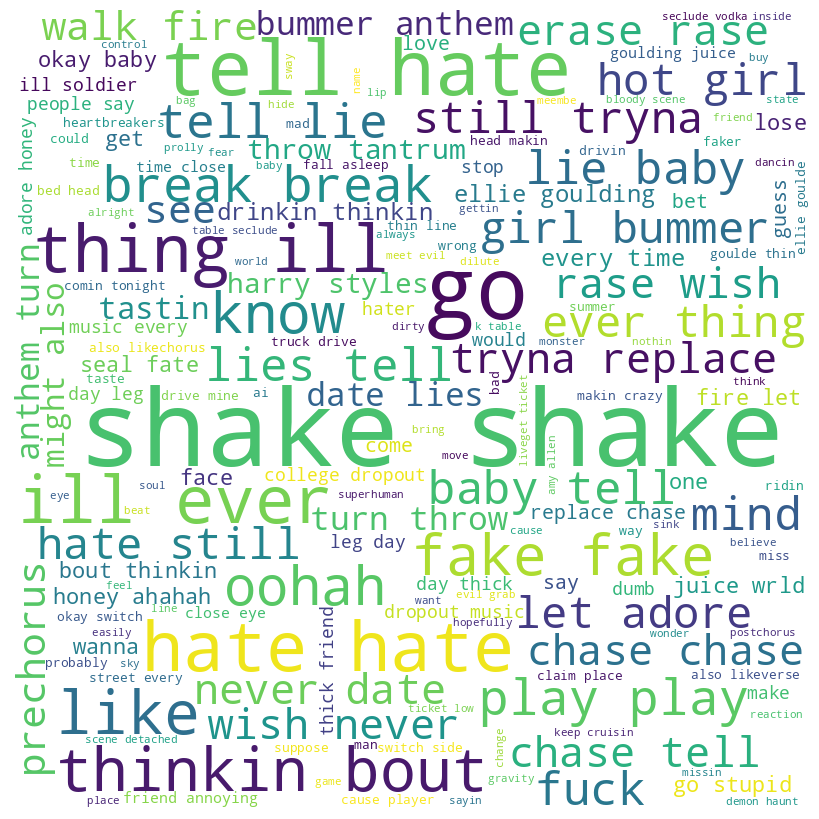

In [188]:
neg = ' '.join(negative_lyrics['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(neg)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

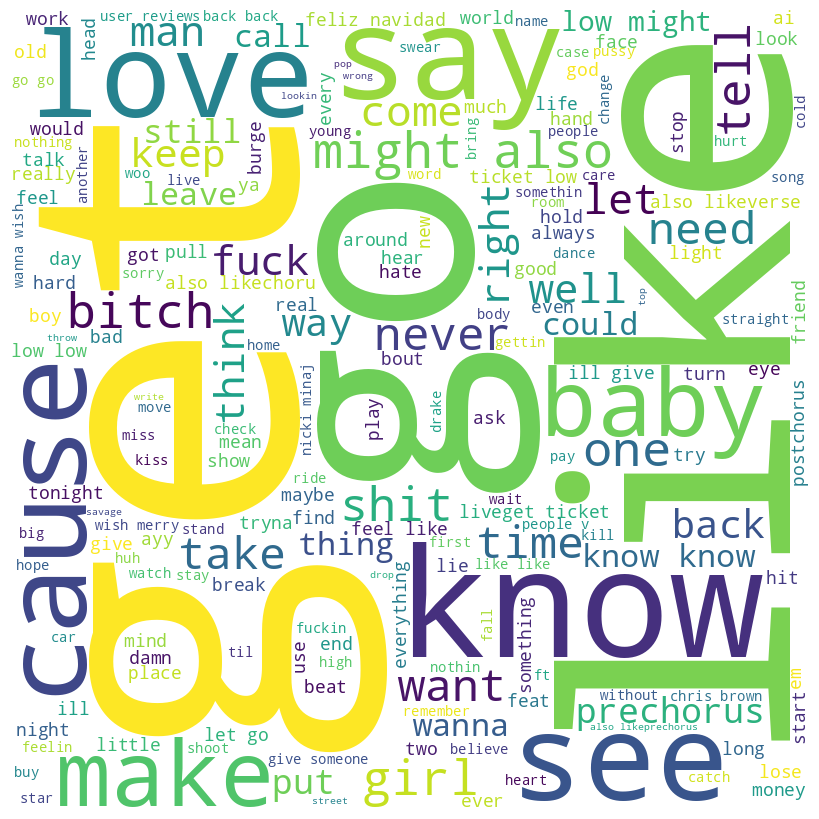

In [189]:
neu = ' '.join(neutral_lyrics['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(neu)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## word count

In [190]:
# have a df comparing the word frequency of positive and negative sentiment and neutral sentiment
# merge the three dfs

from collections import Counter
def get_word_freq(text):
    words = text.split()
    return Counter(words)

pos_freq = get_word_freq(pos)
neg_freq = get_word_freq(neg)
neu_freq = get_word_freq(neu)

# only keep the top 20 words
pos_df = pd.DataFrame.from_dict(pos_freq, orient='index').reset_index()
pos_df.columns = ['word', 'count']
pos_df = pos_df.sort_values('count', ascending=False)
pos_df = pos_df.head(20)

neg_df = pd.DataFrame.from_dict(neg_freq, orient='index').reset_index()
neg_df.columns = ['word', 'count']
neg_df = neg_df.sort_values('count', ascending=False)
neg_df = neg_df.head(20)

neu_df = pd.DataFrame.from_dict(neu_freq, orient='index').reset_index()
neu_df.columns = ['word', 'count']
neu_df = neu_df.sort_values('count', ascending=False)
neu_df = neu_df.head(20)

pos_df.reset_index(drop=True, inplace=True)
neg_df.reset_index(drop=True, inplace=True)
neu_df.reset_index(drop=True, inplace=True)

# 横向拼接 使得一共只有一个df（20行，6列）
df=pd.concat([pos_df, neg_df, neu_df], axis=1)
df.columns = ['positive_word', 'positive_count', 'negative_word', 'negative_count', 'neutral_word', 'neutral_count']
df

,positive_word,positive_count,negative_word,negative_count,neutral_word,neutral_count
0,not,3090,hate,77,not,5460
1,i,2373,shake,70,i,4879
2,love,1981,tell,53,get,4012
3,get,1826,go,43,like,2866
4,do,1593,i,38,do,2730
5,go,1362,not,36,know,2728
6,like,1343,you,30,go,2378
7,know,1331,baby,28,say,1445
8,baby,1007,ill,27,baby,1373
9,you,950,to,23,make,1354


# with genre

In [191]:
lyrics_w_genre=pd.read_csv('/Users/zhuxiaoai/Desktop/lyrics_w_genre.csv')
lyrics_w_genre

,Unnamed: 0,song_title,artist_name,rank,year,song_lyrics,language,artist_id,genre_artist,processed_lyrics,sentiment
0,0,Firework,Katy Perry,1,2010,128 ContributorsTranslationsPortuguêsTürkçeIta...,en,NaN,NaN,wind want start ever feel feel paperthin like ...,0.310937
1,1,Grenade,Bruno Mars,2,2010,137 ContributorsTranslationsPortuguêsFrançaisE...,en,0du5cEVh5yTK9QJze8zA0C,pop,take take take never give should ve know troub...,-0.003571
2,2,What's My Name?,Rihanna Featuring Drake,3,2010,117 ContributorsTranslationsEspañolPortuguêsEn...,en,NaN,NaN,what name what name what name what name what n...,0.231988
3,3,Raise Your Glass,P!nk,4,2010,37 ContributorsRaise Your Glass Lyrics[Verse 1...,en,1KCSPY1glIKqW2TotWuXOR,pop,to lose mind tonight what dealio love much tur...,-0.082262
4,4,We R Who We R,Ke$ha,5,2010,52 ContributorsTranslationsPortuguêsWe R Who W...,en,17jHTblN6WXR5MRIid1zay,NaN,one we roll we cause make hipster fall love ge...,-0.272250
...,...,...,...,...,...,...,...,...,...,...,...
1240,1240,Feather,Sabrina Carpenter,94,2023,42 ContributorsTranslationsPortuguêsEspañolСрп...,en,74KM79TiuVKeVCqs8QtB0B,pop,come true platter pull back try make plan two ...,0.117000
1241,1241,Can't Catch Me Now,Olivia Rodrigo,95,2023,73 ContributorsTranslationsEspañolPortuguêsDeu...,en,1McMsnEElThX1knmY4oliG,pop,write wall shadows we still dancin every room ...,0.076837
1242,1242,Standing Next To You,Jung Kook,97,2023,44 ContributorsTranslationsEspañol日本語العربيةРу...,en,6HaGTQPmzraVmaVxvz6EUc,k-pop,funk give miracle let ya body know make known ...,0.018027
1243,1243,Man Made A Bar,Morgan Wallen Featuring Eric Church,98,2023,15 ContributorsMan Made A Bar Lyrics[Verse 1: ...,en,NaN,NaN,like dern fool cause walk bartender say get ca...,0.246834


# keep the main genres

In [197]:
print(lyrics_w_genre['genre_artist'].value_counts())
print(lyrics_w_genre['genre_artist'].nunique())

genre_artist
pop                        283
country                    210
hip hop                    178
adult standards             51
rock                        45
r&b                         35
deep talent show            12
boy band                     9
british soul                 9
black americana              8
new romantic                 7
american folk revival        7
indietronica                 6
blues                        6
neo mellow                   5
movie tunes                  5
electropop                   5
motown                       5
chicago bop                  4
chicago soul                 3
neo soul                     3
la indie                     3
a cappella                   3
permanent wave               3
glee club                    3
escape room                  3
pov: indie                   2
k-pop                        2
florida drill                2
jazz trio                    2
ccm                          2
gen z singer-songwriter   

In [193]:
# replace genres including "rap" to rap using regex


In [194]:
lyrics_w_genre['genre_artist'] = lyrics_w_genre['genre_artist'].str.replace(r'.*rap.*', 'rap', regex=True)
pop_genres=['dance pop', 'barbadian pop', 'pop','alternative metal', 'alt z',
       'baroque pop', 'canadian pop', 'art pop', 'electropowerpop',
       'folk-pop', 'acoustic pop', 'pop dance',
       'german pop', 'post-teen pop', 'nyc pop',
       'latin pop', 'brill building pop', 'australian pop',
       'viral pop','bedroom pop', 'modern alternative pop',
       'scandipop', 'modern indie pop','alt z',
       'singer-songwriter pop']
# make them all pop
lyrics_w_genre['genre_artist'] = lyrics_w_genre['genre_artist'].apply(lambda x: 'pop' if x in pop_genres else x)

country_genres=['contemporary country', 'classic oklahoma country',
       'australian country', 'arkansas country', 'country dawn',
       'modern country rock', 'classic texas country', 'country pop',
       'modern country pop']
# make them all country
lyrics_w_genre['genre_artist'] = lyrics_w_genre['genre_artist'].apply(lambda x: 'country' if x in country_genres else x)

hip_hop_genres=['hip hop', 'atl hip hop', 'east coast hip hop','rap','hip pop',
       'conscious hip hop', 'canadian hip hop', 'lgbtq+ hip hop',
       'detroit hip hop', 'southern hip hop', 'kentucky hip hop',
       'memphis hip hop', 'hawaiian hip hop', 'australian hip hop',
       'deep underground hip hop', 'alternative hip hop']
# make them all hip hop
lyrics_w_genre['genre_artist'] = lyrics_w_genre['genre_artist'].apply(lambda x: 'hip hop' if x in hip_hop_genres else x)

rnb_genres=['r&b', 'contemporary r&b', 'canadian contemporary r&b', 'pop r&b',
       'alternative r&b', 'chill r&b', 'indie r&b']
# make them all r&b
lyrics_w_genre['genre_artist'] = lyrics_w_genre['genre_artist'].apply(lambda x: 'r&b' if x in rnb_genres else x)

rock_genres=['modern rock', 'piano rock', 'modern folk rock', 'celtic rock',
       'alternative rock', 'indie rock', 'modern alternative rock',
       'garage rock', 'rock-and-roll', 'classic rock', 'album rock',
       'glam rock']
# make them all rock
lyrics_w_genre['genre_artist'] = lyrics_w_genre['genre_artist'].apply(lambda x: 'rock' if x in rock_genres else x)

In [222]:
pop_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='pop']
country_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='country']
hip_hop_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='hip hop']
rock_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='rock']
rnb_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='r&b']

<Axes: xlabel='year', ylabel='sentiment'>

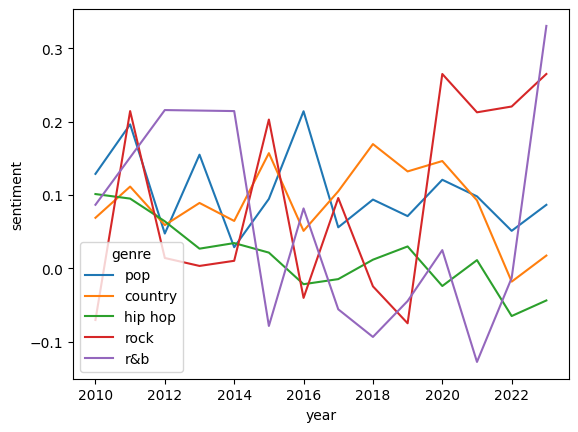

In [217]:
# do 4 visualizations for the 4 genres

# line chart in one plot using sns
# pop
import seaborn as sns
pop_songs = pop_songs.groupby('year')['sentiment'].mean()
pop_songs = pop_songs.reset_index()
pop_songs['genre'] = 'pop'

country_songs = country_songs.groupby('year')['sentiment'].mean()
country_songs = country_songs.reset_index()
country_songs['genre'] = 'country'

hip_hop_songs = hip_hop_songs.groupby('year')['sentiment'].mean()
hip_hop_songs = hip_hop_songs.reset_index()
hip_hop_songs['genre'] = 'hip hop'

rock_songs = rock_songs.groupby('year')['sentiment'].mean()
rock_songs = rock_songs.reset_index()
rock_songs['genre'] = 'rock'

rnb_songs = rnb_songs.groupby('year')['sentiment'].mean()
rnb_songs = rnb_songs.reset_index()
rnb_songs['genre'] = 'r&b'

all_songs = pd.concat([pop_songs, country_songs, hip_hop_songs, rock_songs, rnb_songs])
sns.lineplot(all_songs, x='year', y='sentiment', hue='genre')

In [ ]:
pop_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='pop']
country_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='country']
hip_hop_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='hip hop']
rock_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='rock']
rnb_songs=lyrics_w_genre[lyrics_w_genre['genre_artist']=='r&b']

In [223]:
# compare the word cloud and word frequency of the 4 genres in 2010 and 2023
pop_2010 = pop_songs[pop_songs['year'] == 2010]
pop_2023 = pop_songs[pop_songs['year'] == 2023]

country_2010 = country_songs[country_songs['year'] == 2010]
country_2023 = country_songs[country_songs['year'] == 2023]

hip_hop_2010 = hip_hop_songs[hip_hop_songs['year'] == 2010]
hip_hop_2023 = hip_hop_songs[hip_hop_songs['year'] == 2023]

rnb_2010 = rnb_songs[rnb_songs['year'] == 2010]
rnb_2023 = rnb_songs[rnb_songs['year'] == 2023]

rock_2010 = rock_songs[rock_songs['year'] == 2010]
rock_2023 = rock_songs[rock_songs['year'] == 2023]

## pop 2010 and 2023

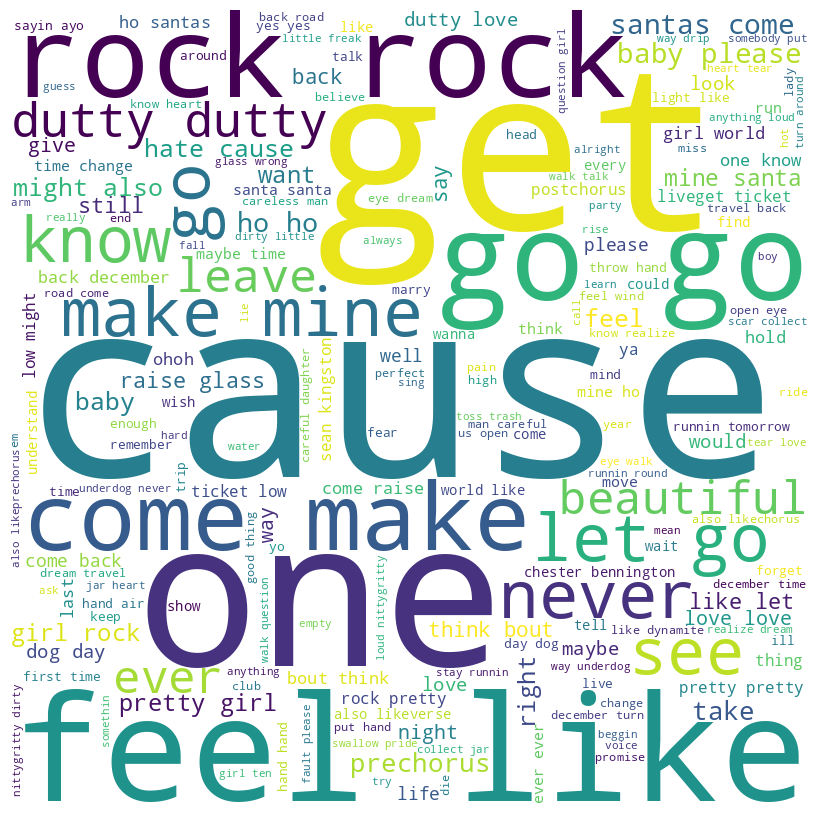

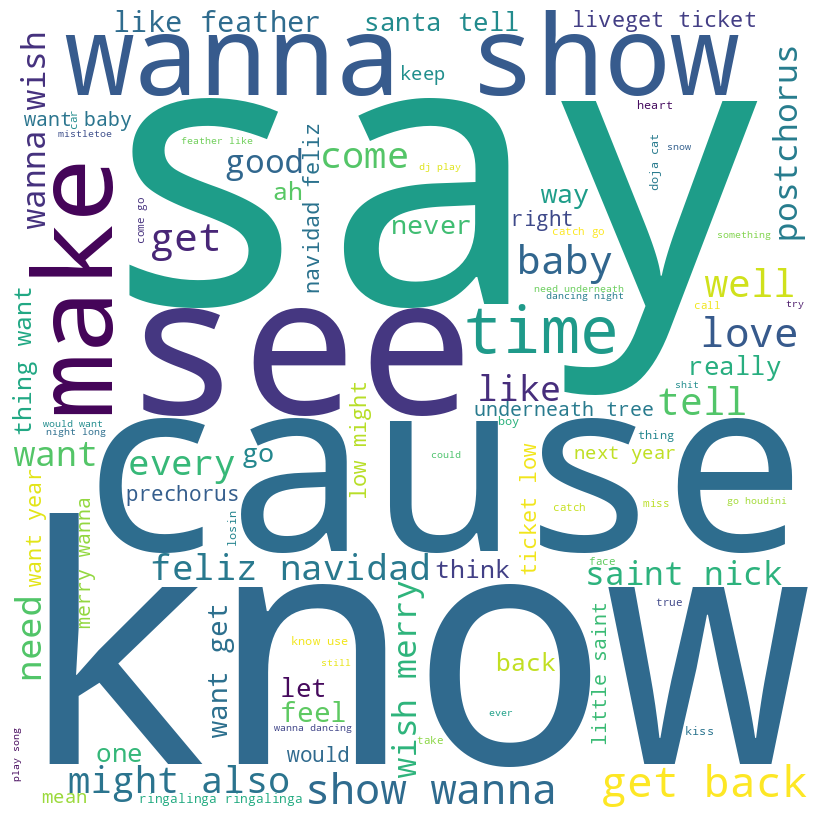

,2010_word,2010_count,2023_word,2023_count
0,not,130,not,163
1,i,128,i,121
2,go,114,wanna,98
3,do,92,want,84
4,come,83,get,81
5,like,69,you,66
6,cause,63,do,65
7,make,59,like,63
8,love,58,know,52
9,feel,52,say,51


In [202]:
# compare 2010 and 2023
# pop word cloud
pop_2010_wc = ' '.join(pop_2010['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(pop_2010_wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

pop_2023_wc = ' '.join(pop_2023['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(pop_2023_wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# compare the word frequency of pop in 2010 and 2023
pop_2010_freq = get_word_freq(pop_2010_wc)
pop_2023_freq = get_word_freq(pop_2023_wc)

pop_2010_df = pd.DataFrame.from_dict(pop_2010_freq, orient='index').reset_index()
pop_2010_df.columns = ['word', 'count']
pop_2010_df = pop_2010_df.sort_values('count', ascending=False)
pop_2010_df = pop_2010_df.head(20)

pop_2023_df = pd.DataFrame.from_dict(pop_2023_freq, orient='index').reset_index()
pop_2023_df.columns = ['word', 'count']
pop_2023_df = pop_2023_df.sort_values('count', ascending=False)
pop_2023_df = pop_2023_df.head(20)

pop_2010_df.reset_index(drop=True, inplace=True)
pop_2023_df.reset_index(drop=True, inplace=True)

df_pop=pd.concat([pop_2010_df, pop_2023_df], axis=1)
df_pop.columns = ['2010_word', '2010_count', '2023_word', '2023_count']
df_pop


## rnb 2010 and 2023

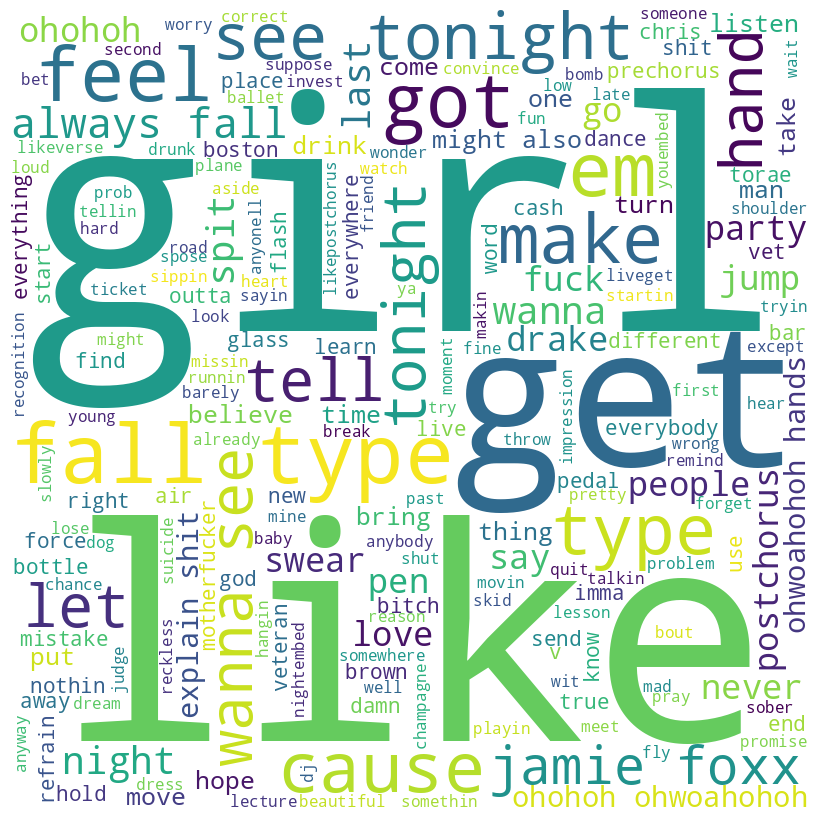

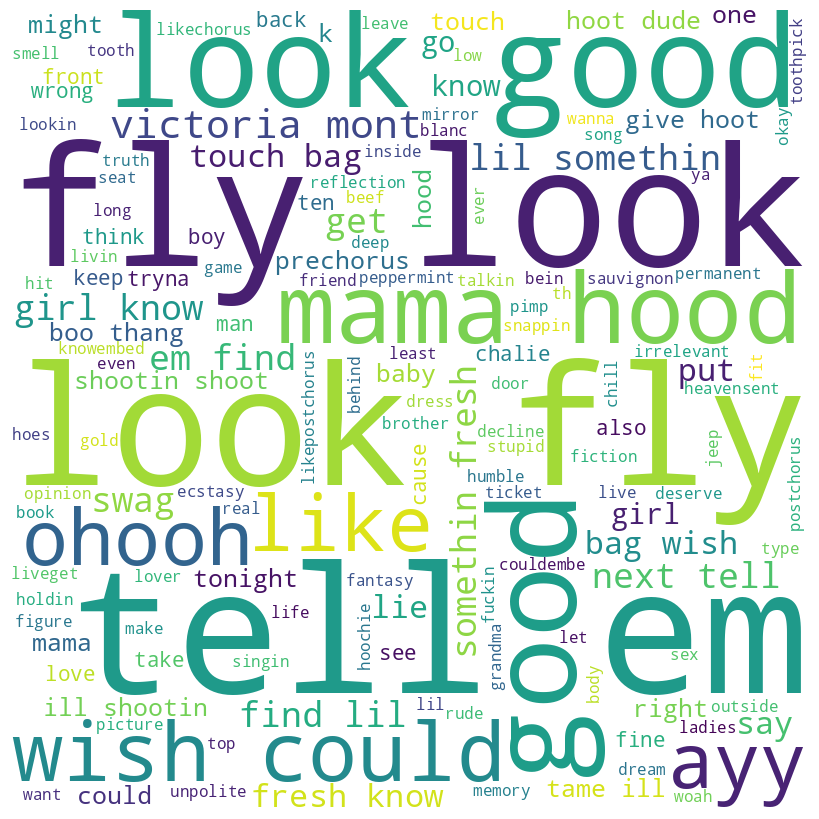

,2010_word,2010_count,2023_word,2023_count
0,type,17,look,36
1,i,15,good,34
2,girl,15,i,25
3,see,13,tell,20
4,like,13,em,18
5,to,13,fly,18
6,tonight,13,know,15
7,not,12,mama,13
8,get,11,lil,13
9,fall,11,hood,13


In [219]:
# rnb
rnb_2010_wc = ' '.join(rnb_2010['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(rnb_2010_wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

rnb_2023_wc = ' '.join(rnb_2023['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(rnb_2023_wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# compare the word frequency of rnb in 2010 and 2023
rnb_2010_freq = get_word_freq(rnb_2010_wc)
rnb_2023_freq = get_word_freq(rnb_2023_wc)

rnb_2010_df = pd.DataFrame.from_dict(rnb_2010_freq, orient='index').reset_index()
rnb_2010_df.columns = ['word', 'count']
rnb_2010_df = rnb_2010_df.sort_values('count', ascending=False)
rnb_2010_df = rnb_2010_df.head(20)

rnb_2023_df = pd.DataFrame.from_dict(rnb_2023_freq, orient='index').reset_index()
rnb_2023_df.columns = ['word', 'count']

rnb_2023_df = rnb_2023_df.sort_values('count', ascending=False)
rnb_2023_df = rnb_2023_df.head(20)

rnb_2010_df.reset_index(drop=True, inplace=True)
rnb_2023_df.reset_index(drop=True, inplace=True)

df_rnb=pd.concat([rnb_2010_df, rnb_2023_df], axis=1)
df_rnb.columns = ['2010_word', '2010_count', '2023_word', '2023_count']
df_rnb

## rock 2010 and 2023

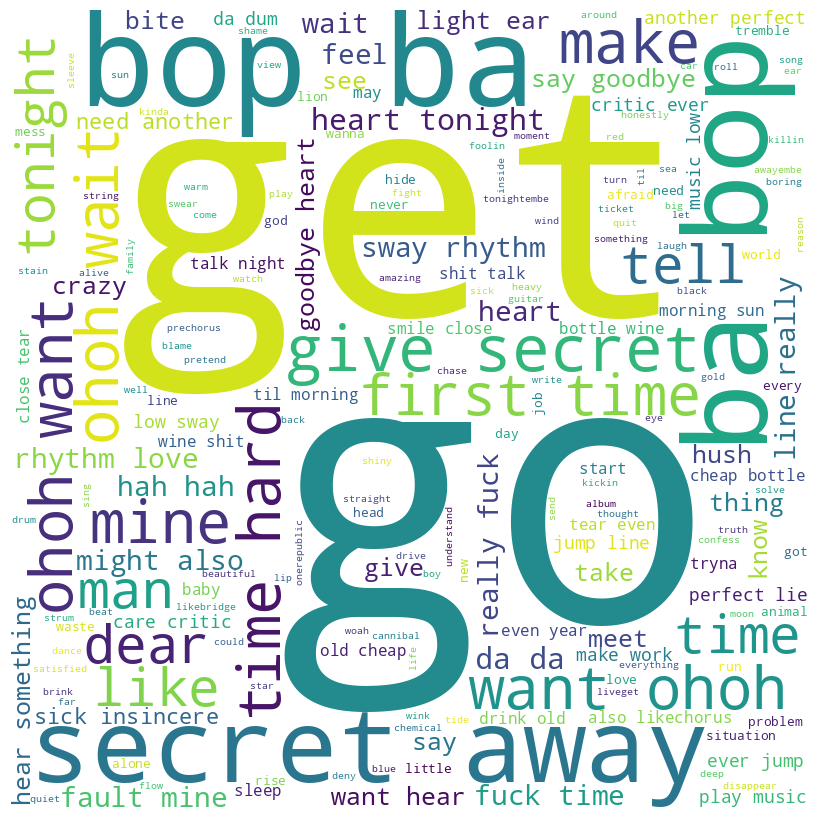

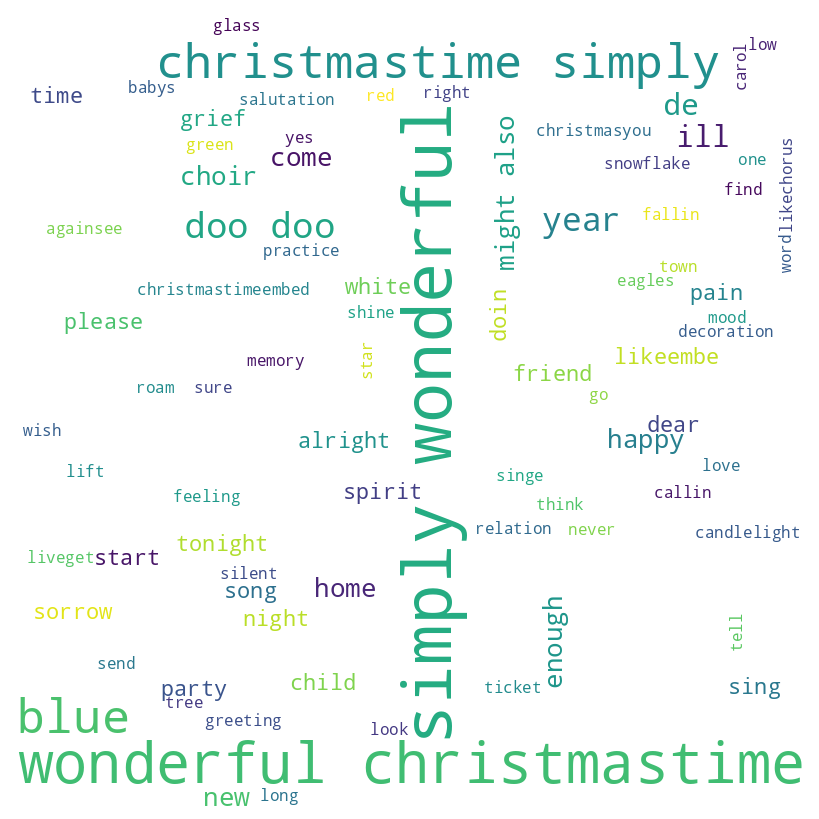

,2010_word,2010_count,2023_word,2023_count
0,not,36,wonderful,18
1,time,25,simply,17
2,do,23,christmastime,17
3,i,19,blue,11
4,go,19,doo,7
5,ohoh,17,de,4
6,heart,15,you,4
7,get,14,ill,4
8,mine,12,enough,3
9,bop,12,also,3


In [224]:
# rock
rock_2010_wc = ' '.join(rock_2010['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(rock_2010_wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

rock_2023_wc = ' '.join(rock_2023['processed_lyrics'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(rock_2023_wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.tight_layout(pad = 0)
plt.show()

# compare the word frequency of rock in 2010 and 2023
rock_2010_freq = get_word_freq(rock_2010_wc)
rock_2023_freq = get_word_freq(rock_2023_wc)

rock_2010_df = pd.DataFrame.from_dict(rock_2010_freq, orient='index').reset_index()
rock_2010_df.columns = ['word', 'count']
rock_2010_df = rock_2010_df.sort_values('count', ascending=False)
rock_2010_df = rock_2010_df.head(20)

rock_2023_df = pd.DataFrame.from_dict(rock_2023_freq, orient='index').reset_index()
rock_2023_df.columns = ['word', 'count']
rock_2023_df = rock_2023_df.sort_values('count', ascending=False)
rock_2023_df = rock_2023_df.head(20)

rock_2010_df.reset_index(drop=True, inplace=True)
rock_2023_df.reset_index(drop=True, inplace=True)

df_rock=pd.concat([rock_2010_df, rock_2023_df], axis=1)
df_rock.columns = ['2010_word', '2010_count', '2023_word', '2023_count']
df_rock